In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [48]:
date=['2020-07-17','2020-07-24','2020-07-31','2020-08-07','2020-08-14','2020-08-21','2020-08-28','2020-09-04','2020-09-11','2020-09-18','2020-09-25']

In [53]:
for z in range(10):
    if z==0:
        data=pd.read_excel('Competição.xlsx')
        rentabilidade=[]
        rent=[0]*4
        data.drop([0,1,2,3], inplace=True)
        data.drop(data.columns[5],axis=1, inplace=True)
        for j in range(len(data)):
            if not pd.isnull(data.iloc[j,1]):
                for i in range(4):
                    a=wb.DataReader(data.iloc[j][1+i], data_source='yahoo', start=date[z], end=date[z+1])['Adj Close']
                    rent[i]=((a[-1]/a[0])-1)
                data.iloc[j,5]=(1+np.mean(rent))*data.iloc[j,5]
    else:
        print('Competição EPPEN FINANCE ('+str(z-1)+').xlsx')
        datinha=pd.read_excel('Competição EPPEN FINANCE ('+str(z-1)+').xlsx')
        datinha.drop([0,1,2,3], inplace=True)
        datinha.drop(datinha.columns[5],axis=1, inplace=True)
        data.iloc[:,0:5]=datinha
        for j in range(len(data)):
            if not pd.isnull(data.iloc[j,1]):
                for i in range(4):
                    a=wb.DataReader(data.iloc[j][1+i], data_source='yahoo', start=date[z], end=date[z+1])['Adj Close']
                    rent[i]=((a[-1]/a[0])-1)
                data.iloc[j,5]=(1+np.mean(rent))*data.iloc[j,5]

Competição EPPEN FINANCE (0).xlsx
Competição EPPEN FINANCE (1).xlsx
Competição EPPEN FINANCE (2).xlsx
Competição EPPEN FINANCE (3).xlsx
Competição EPPEN FINANCE (4).xlsx
Competição EPPEN FINANCE (5).xlsx
Competição EPPEN FINANCE (6).xlsx
Competição EPPEN FINANCE (7).xlsx
Competição EPPEN FINANCE (8).xlsx


In [66]:
data['Rentabilidade']=round(((data['Unnamed: 6']/100)-1)*100,2)

In [62]:
data=data.sort_values(by=['Rentabilidade'], ascending=False)

In [64]:
b=wb.DataReader('^BVSP', data_source='yahoo', start='2020-07-17')['Adj Close']
b=round(((b[-1]/b[0])-1)*100,2)

# Comparação gráfica:

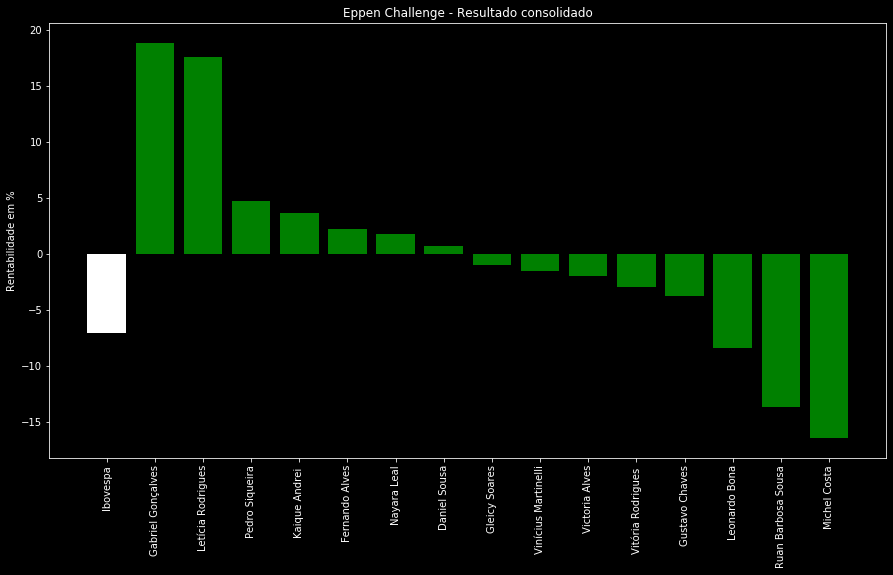

In [69]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.bar('Ibovespa',b,color='white')
plt.bar(data['Integrante'],data['Rentabilidade'],color='green')
plt.ylabel('Rentabilidade em %')
plt.title('Eppen Challenge - Resultado consolidado')
plt.xticks(rotation=90)
plt.show()